<a href="https://colab.research.google.com/github/Nanungi/Malaria-Surveillance-of-Uganda/blob/main/malaria_surveillance_of_Uganda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [42]:
#loading the data
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler ,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import make_pipeline

In [43]:
#loading data
path='/content/drive/MyDrive/data VIZ/malaria_indicators_uga.csv'
df=pd.read_csv(path)
df.head()

,GHO (CODE),GHO (DISPLAY),GHO (URL),YEAR (DISPLAY),STARTYEAR,ENDYEAR,REGION (CODE),REGION (DISPLAY),COUNTRY (CODE),COUNTRY (DISPLAY),DIMENSION (TYPE),DIMENSION (CODE),DIMENSION (NAME),Numeric,Value,Low,High
0,#indicator+code,#indicator+name,#indicator+url,#date+year,#date+year+start,#date+year+end,#region+code,#region+name,#country+code,#country+name,#dimension+type,#dimension+code,#dimension+name,#indicator+value+num,#indicator+value,#indicator+value+low,#indicator+value+high
1,MALARIA_TOTAL_CASES,Total number of malaria cases (presumed + con...,https://www.who.int/data/gho/data/indicators/i...,2023,2023,2023,AFR,Africa,UGA,Uganda,NaN,NaN,NaN,16525582.0,16 525 582,NaN,NaN
2,MALARIA_EST_INCIDENCE,Estimated malaria incidence (per 1000 populati...,https://www.who.int/data/gho/data/indicators/i...,2011,2011,2011,AFR,Africa,UGA,Uganda,NaN,NaN,NaN,393.98389,393.98 [311.04-490.07],311.03833,490.06641
3,MALARIA_EST_INCIDENCE,Estimated malaria incidence (per 1000 populati...,https://www.who.int/data/gho/data/indicators/i...,2001,2001,2001,AFR,Africa,UGA,Uganda,NaN,NaN,NaN,508.33668,508.34 [387.15-648.96],387.14781,648.95999
4,MALARIA_CONF_CASES,Number of confirmed malaria cases,https://www.who.int/data/gho/data/indicators/i...,2016,2016,2016,AFR,Africa,UGA,Uganda,NaN,NaN,NaN,9735849.0,9 735 849,NaN,NaN


In [44]:
# data inspection
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   GHO (CODE)         129 non-null    object
 1   GHO (DISPLAY)      129 non-null    object
 2   GHO (URL)          129 non-null    object
 3   YEAR (DISPLAY)     129 non-null    object
 4   STARTYEAR          129 non-null    object
 5   ENDYEAR            129 non-null    object
 6   REGION (CODE)      129 non-null    object
 7   REGION (DISPLAY)   129 non-null    object
 8   COUNTRY (CODE)     129 non-null    object
 9   COUNTRY (DISPLAY)  129 non-null    object
 10  DIMENSION (TYPE)   1 non-null      object
 11  DIMENSION (CODE)   1 non-null      object
 12  DIMENSION (NAME)   1 non-null      object
 13  Numeric            129 non-null    object
 14  Value              129 non-null    object
 15  Low                49 non-null     object
 16  High               49 non-null     object
dt

In [45]:
# Drop unnecessary columns with mostly null or placeholder data
columns_to_drop = [
    "GHO (CODE)", "GHO (URL)", "DIMENSION (TYPE)", "DIMENSION (CODE)",
    "DIMENSION (NAME)", "Numeric", "Low", "High"
]
df = df.drop(columns=columns_to_drop)
df

,GHO (DISPLAY),YEAR (DISPLAY),STARTYEAR,ENDYEAR,REGION (CODE),REGION (DISPLAY),COUNTRY (CODE),COUNTRY (DISPLAY),Value
0,#indicator+name,#date+year,#date+year+start,#date+year+end,#region+code,#region+name,#country+code,#country+name,#indicator+value
1,Total number of malaria cases (presumed + con...,2023,2023,2023,AFR,Africa,UGA,Uganda,16 525 582
2,Estimated malaria incidence (per 1000 populati...,2011,2011,2011,AFR,Africa,UGA,Uganda,393.98 [311.04-490.07]
3,Estimated malaria incidence (per 1000 populati...,2001,2001,2001,AFR,Africa,UGA,Uganda,508.34 [387.15-648.96]
4,Number of confirmed malaria cases,2016,2016,2016,AFR,Africa,UGA,Uganda,9 735 849
...,...,...,...,...,...,...,...,...,...
124,Number of suspected malaria cases,2017,2017,2017,AFR,Africa,UGA,Uganda,22 319 643
125,Estimated malaria mortality rate (per 100 000 ...,2005,2005,2005,AFR,Africa,UGA,Uganda,110.68 [105.09-116.52]
126,Number of malaria positive cases by microscopy,2018,2018,2018,AFR,Africa,UGA,Uganda,458 909
127,Number of malaria suspects examined by microscopy,2015,2015,2015,AFR,Africa,UGA,Uganda,3 684 722


In [46]:
# Rename columns for easier access
df=df.rename(columns={'GHO (DISPLAY)':"Indicator_Display",'YEAR (DISPLAY)':"Year"	,'STARTYEAR':"Start_Year",'	ENDYEAR	REGION (CODE)':"End_Year",	'REGION (DISPLAY)':'Region_Code',	'COUNTRY (CODE)':'Country_Code'	,'COUNTRY (DISPLAY)':'Country'})

df

,Indicator_Display,Year,Start_Year,ENDYEAR,REGION (CODE),Region_Code,Country_Code,Country,Value
0,#indicator+name,#date+year,#date+year+start,#date+year+end,#region+code,#region+name,#country+code,#country+name,#indicator+value
1,Total number of malaria cases (presumed + con...,2023,2023,2023,AFR,Africa,UGA,Uganda,16 525 582
2,Estimated malaria incidence (per 1000 populati...,2011,2011,2011,AFR,Africa,UGA,Uganda,393.98 [311.04-490.07]
3,Estimated malaria incidence (per 1000 populati...,2001,2001,2001,AFR,Africa,UGA,Uganda,508.34 [387.15-648.96]
4,Number of confirmed malaria cases,2016,2016,2016,AFR,Africa,UGA,Uganda,9 735 849
...,...,...,...,...,...,...,...,...,...
124,Number of suspected malaria cases,2017,2017,2017,AFR,Africa,UGA,Uganda,22 319 643
125,Estimated malaria mortality rate (per 100 000 ...,2005,2005,2005,AFR,Africa,UGA,Uganda,110.68 [105.09-116.52]
126,Number of malaria positive cases by microscopy,2018,2018,2018,AFR,Africa,UGA,Uganda,458 909
127,Number of malaria suspects examined by microscopy,2015,2015,2015,AFR,Africa,UGA,Uganda,3 684 722


In [47]:
#dropping the row at 0
df=df.drop(index=0)
df

,Indicator_Display,Year,Start_Year,ENDYEAR,REGION (CODE),Region_Code,Country_Code,Country,Value
1,Total number of malaria cases (presumed + con...,2023,2023,2023,AFR,Africa,UGA,Uganda,16 525 582
2,Estimated malaria incidence (per 1000 populati...,2011,2011,2011,AFR,Africa,UGA,Uganda,393.98 [311.04-490.07]
3,Estimated malaria incidence (per 1000 populati...,2001,2001,2001,AFR,Africa,UGA,Uganda,508.34 [387.15-648.96]
4,Number of confirmed malaria cases,2016,2016,2016,AFR,Africa,UGA,Uganda,9 735 849
5,Number of suspected malaria cases,2015,2015,2015,AFR,Africa,UGA,Uganda,22 952 246
...,...,...,...,...,...,...,...,...,...
124,Number of suspected malaria cases,2017,2017,2017,AFR,Africa,UGA,Uganda,22 319 643
125,Estimated malaria mortality rate (per 100 000 ...,2005,2005,2005,AFR,Africa,UGA,Uganda,110.68 [105.09-116.52]
126,Number of malaria positive cases by microscopy,2018,2018,2018,AFR,Africa,UGA,Uganda,458 909
127,Number of malaria suspects examined by microscopy,2015,2015,2015,AFR,Africa,UGA,Uganda,3 684 722


In [48]:
#drop more columns.
df=df.drop(columns=['Region_Code','Country_Code','REGION (CODE)'])
df

,Indicator_Display,Year,Start_Year,ENDYEAR,Country,Value
1,Total number of malaria cases (presumed + con...,2023,2023,2023,Uganda,16 525 582
2,Estimated malaria incidence (per 1000 populati...,2011,2011,2011,Uganda,393.98 [311.04-490.07]
3,Estimated malaria incidence (per 1000 populati...,2001,2001,2001,Uganda,508.34 [387.15-648.96]
4,Number of confirmed malaria cases,2016,2016,2016,Uganda,9 735 849
5,Number of suspected malaria cases,2015,2015,2015,Uganda,22 952 246
...,...,...,...,...,...,...
124,Number of suspected malaria cases,2017,2017,2017,Uganda,22 319 643
125,Estimated malaria mortality rate (per 100 000 ...,2005,2005,2005,Uganda,110.68 [105.09-116.52]
126,Number of malaria positive cases by microscopy,2018,2018,2018,Uganda,458 909
127,Number of malaria suspects examined by microscopy,2015,2015,2015,Uganda,3 684 722


In [49]:
# Filter for Uganda-specific data
uganda_df = df[df["Country"] == "Uganda"]
uganda_df

,Indicator_Display,Year,Start_Year,ENDYEAR,Country,Value
1,Total number of malaria cases (presumed + con...,2023,2023,2023,Uganda,16 525 582
2,Estimated malaria incidence (per 1000 populati...,2011,2011,2011,Uganda,393.98 [311.04-490.07]
3,Estimated malaria incidence (per 1000 populati...,2001,2001,2001,Uganda,508.34 [387.15-648.96]
4,Number of confirmed malaria cases,2016,2016,2016,Uganda,9 735 849
5,Number of suspected malaria cases,2015,2015,2015,Uganda,22 952 246
...,...,...,...,...,...,...
124,Number of suspected malaria cases,2017,2017,2017,Uganda,22 319 643
125,Estimated malaria mortality rate (per 100 000 ...,2005,2005,2005,Uganda,110.68 [105.09-116.52]
126,Number of malaria positive cases by microscopy,2018,2018,2018,Uganda,458 909
127,Number of malaria suspects examined by microscopy,2015,2015,2015,Uganda,3 684 722


In [51]:
# Sort by year for trend analysis
uganda_df["Year"] = pd.to_numeric(uganda_df["Year"], errors="coerce")
uganda_df = uganda_df.sort_values(by="Year")
uganda_df

,Indicator_Display,Year,Start_Year,ENDYEAR,Country,Value
73,Estimated malaria incidence (per 1000 populati...,2000,2000,2000,Uganda,487.64 [375.05-620.94]
78,Estimated malaria mortality rate (per 100 000 ...,2000,2000,2000,Uganda,175.23 [166.39-184.64]
3,Estimated malaria incidence (per 1000 populati...,2001,2001,2001,Uganda,508.34 [387.15-648.96]
6,Estimated malaria mortality rate (per 100 000 ...,2001,2001,2001,Uganda,187.27 [177.55-197.59]
65,Estimated malaria incidence (per 1000 populati...,2002,2002,2002,Uganda,500.39 [385.70-640.84]
...,...,...,...,...,...,...
84,Number of indigenous P. falciparum malaria cases,2023,2023,2023,Uganda,15 968 780
88,Number of malaria positive cases by rapid diag...,2023,2023,2023,Uganda,12 164 951
79,Estimated malaria mortality rate (per 100 000 ...,2023,2023,2023,Uganda,32.77 [28.26-39.60]
99,Number of malaria suspects examined by microscopy,2023,2023,2023,Uganda,5 268 889


In [53]:
# Convert the "Value" column to numeric where possible
def extract_numeric(value):
    if isinstance(value, str):
        # Replace commas and extract the first part before any bracket or text
        value = value.split()[0].replace(",", "")
        try:
            return float(value)
        except ValueError:
            return None
    return value

uganda_df["Value"] = uganda_df["Value"].apply(extract_numeric)


In [54]:
# Group by Indicator and summarize trends
summary = uganda_df.groupby("Indicator_Display").agg(
    Min_Year=('Year', 'min'),
    Max_Year=('Year', 'max'),
    Min_Value=('Value', 'min'),
    Max_Value=('Value', 'max'),
    Average_Value=('Value', 'mean')
).reset_index()

# Display the summary
print("Summary of Indicators for Uganda:")
print(summary)

Summary of Indicators for Uganda:
                                    Indicator_Display  Min_Year  ...  Max_Value  Average_Value
0   Estimated malaria incidence (per 1000 populati...      2000  ...     508.34     365.458750
1   Estimated malaria mortality rate (per 100 000 ...      2000  ...     187.27      82.440000
2                   Number of confirmed malaria cases      2015  ...      19.00      12.111111
3    Number of indigenous P. falciparum malaria cases      2015  ...      19.00      12.111111
4                  Number of indigenous malaria cases      2015  ...      19.00      12.111111
5      Number of malaria positive cases by microscopy      2015  ...     458.00      51.888889
6   Number of malaria positive cases by rapid diag...      2015  ...      15.00      10.000000
7   Number of malaria suspects examined by microscopy      2015  ...       5.00       3.777778
8                    Number of presumed malaria cases      2015  ...     827.00     275.625000
9               

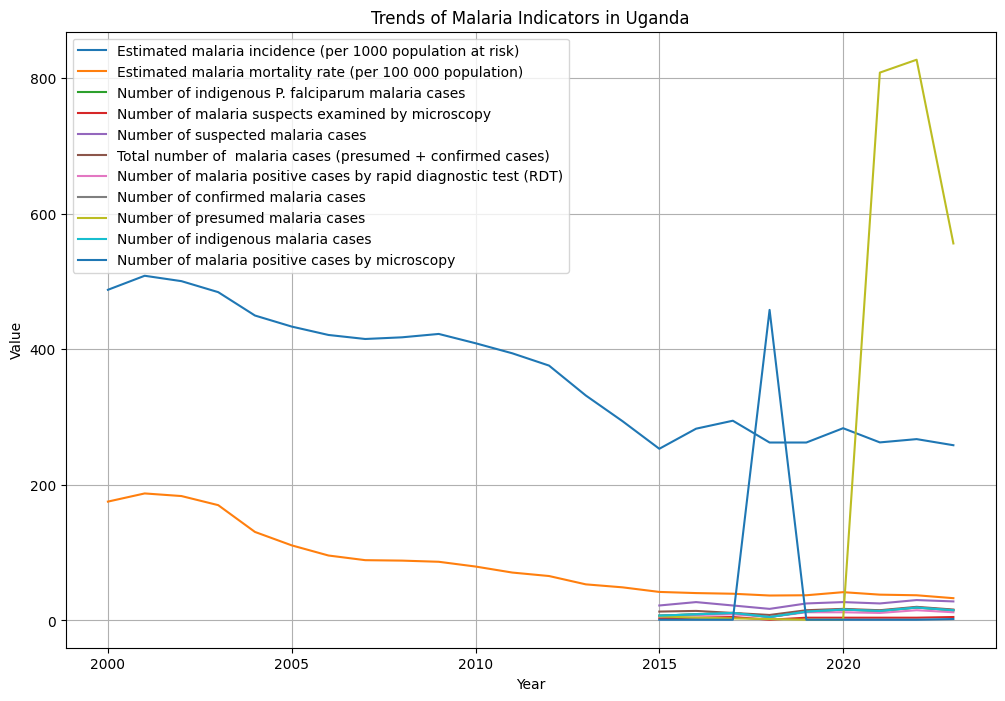

In [55]:
# Plot trends for each indicator
indicators = uganda_df["Indicator_Display"].unique()

plt.figure(figsize=(12, 8))
for indicator in indicators:
    subset = uganda_df[uganda_df["Indicator_Display"] == indicator]
    plt.plot(subset["Year"], subset["Value"], label=indicator)

plt.title("Trends of Malaria Indicators in Uganda")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


In [56]:
# Extract insights
top_trends = summary.sort_values(by="Max_Value", ascending=False).head(5)
print("\nTop 5 Indicators with Highest Max Values:")
print(top_trends)



Top 5 Indicators with Highest Max Values:
                                   Indicator_Display  Min_Year  ...  Max_Value  Average_Value
8                   Number of presumed malaria cases      2015  ...     827.00     275.625000
0  Estimated malaria incidence (per 1000 populati...      2000  ...     508.34     365.458750
5     Number of malaria positive cases by microscopy      2015  ...     458.00      51.888889
1  Estimated malaria mortality rate (per 100 000 ...      2000  ...     187.27      82.440000
9                  Number of suspected malaria cases      2015  ...      30.00      24.777778

[5 rows x 6 columns]


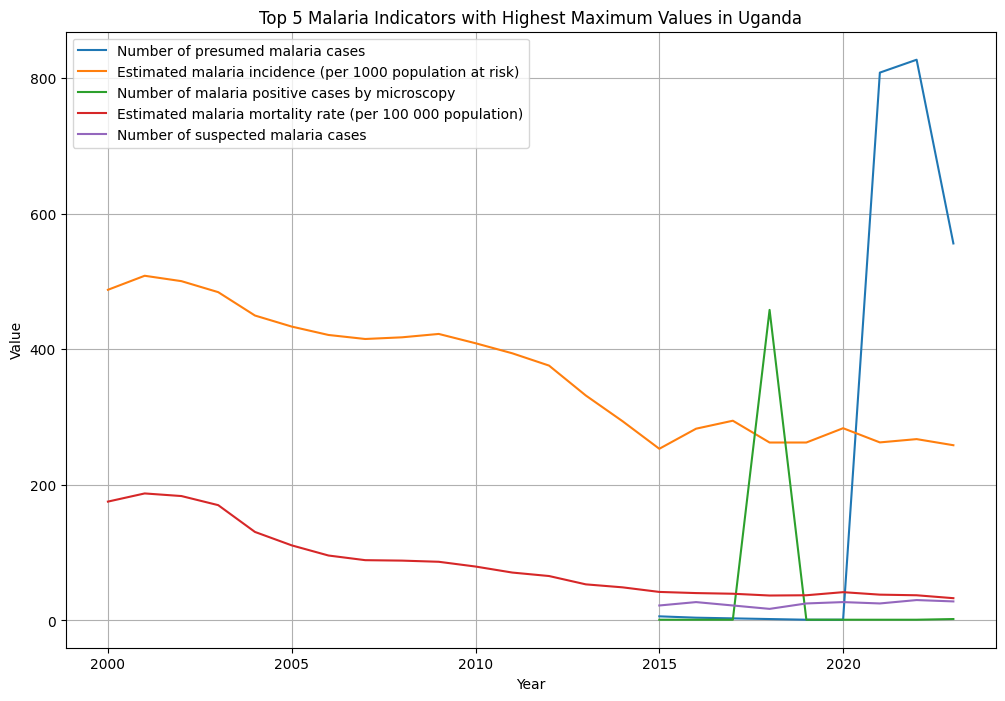

In [61]:
# Filter the top 5 indicators with the highest maximum values
top_indicators = top_trends["Indicator_Display"].values

# Plot trends for the top 5 indicators
plt.figure(figsize=(12, 8))
for indicator in top_indicators:
    subset = uganda_df[uganda_df["Indicator_Display"] == indicator]
    plt.plot(subset["Year"], subset["Value"], label=indicator)

plt.title("Top 5 Malaria Indicators with Highest Maximum Values in Uganda")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()
